### DM-07 Quiz  

#### Import libraries  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [15]:
csv_in = 'iris.csv'

#### Read CSV file  

In [16]:
df = pd.read_csv(csv_in,skiprows=1)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dfX = df.loc[:, ['sepal_len','sepal_width','petal_len','petal_width']]
print(dfX.shape)
display(dfX.head())

(150, 4)


,sepal_len,sepal_width,petal_len,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [20]:
n_pca = 4
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [21]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_)) #need 2

[0.72770452 0.23030523 0.03683832 0.00515193]
[0.72770452 0.95800975 0.99484807 1.        ]


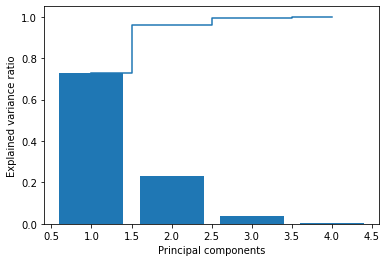

In [22]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
ser_class = df['class']
print(ser_class.value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64


In [24]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red', 'green']

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


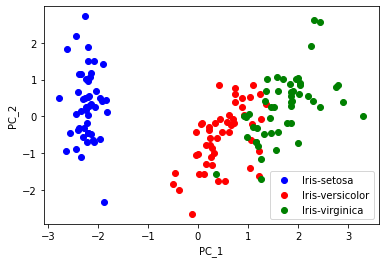

In [25]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

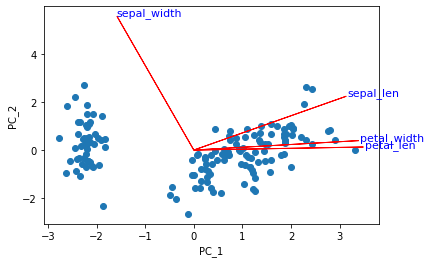

In [26]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)